In [2]:
#1. making recursive filters:
import numpy as np
import math
def low_pass(signal,fc,reverse = False):
    #find x frist
    x = math.exp(-2*np.pi*fc)
    out = [0.0]*len(signal)
    # a and b
    a0 = 1-x
    b1= x
    # aplly filter
    if(reverse == False):
        n = 0
        while n < len(signal):
            out[n]= a0*signal[n]
            if(n-1 >= 0):
                out[n]= out[n] + b1*out[n-1]
            n+=1
    if(reverse == True):
        n = len(signal)-1
        while n >=0:
            out[n]= a0*signal[n]
            if(n+1 <= len(signal)-1):
                out[n]= out[n] + b1*out[n+1]
            n-=1
    return out
def high_pass(signal,fc):
    #find x frist
    x = math.exp(-2*np.pi*fc)
    out = [0.0]*len(signal)
    # a and b
    a0 = (1+x)/2
    a1 = -1*(1+x)/2
    b1= x
    # aplly filter
    n = 0
    while n < len(signal):
        out[n]= a0*signal[n]
        if(n-1 >= 0):
            out[n] = out[n] + a1*signal[n-1] + b1*out[n-1]
        n+=1
    return out
def band_pass(signal,f,bw):
    r=1-3*bw
    k=(1-2*r*np.cos(2*np.pi*f)+r**2)/(2-2*np.cos(2*np.pi*f))
    #out
    out = [0.0]*len(signal)
    #the a
    a0 =1-k
    a1=2*(k-r)*np.cos(2*np.pi*f)
    a2 =r**2 - k
    # the bs
    b1 = 2*r*np.cos(2*np.pi*f)
    b2 = -1*r**2
    #apply filter
    n = 0
    while n < len(signal):
        out[n]= a0*signal[n]
        if(n-1 >= 0):
            out[n] = out[n] + a1*signal[n-1] + b1*out[n-1]
        if(n-2>0):
            out[n] = out[n] + a2*signal[n-2] + b2*out[n-2]
        n+=1
    return out
def band_reject(signal,f,bw):
    r=1-3*bw
    k=(1-2*r*np.cos(2*np.pi*f)+r**2)/(2-2*np.cos(2*np.pi*f))
    #out
    out = [0.0]*len(signal)
    #the a
    a0 =k
    a1=-2*k*np.cos(2*np.pi*f)
    a2 = k
    # the bs
    b1 = 2*r*np.cos(2*np.pi*f)
    b2 = -1*r**2
    #apply filter
    n = 0
    while n < len(signal):
        out[n]= a0*signal[n]
        if(n-1 >= 0):
            out[n] = out[n] + a1*signal[n-1] + b1*out[n-1]
        if(n-2>0):
            out[n] = out[n] + a2*signal[n-2] + b2*out[n-2]
        n+=1
    return out

In [3]:
#2 noise square
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

noise = np.random.uniform(-0.3,0.3,500)
#wave
t = np.linspace(0, 0.01, 500, endpoint=False)
wave = signal.square(2 * np.pi * 500 * t) +noise
plt.plot(t, wave)

plt.show()
#looks kinf of flat at the top like blocks

<Figure size 640x480 with 1 Axes>

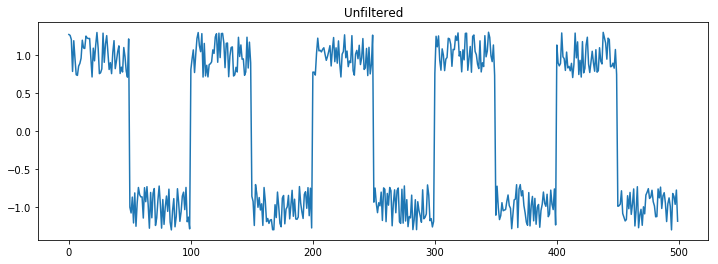

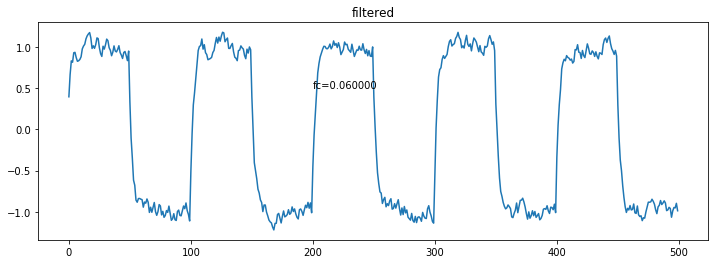

In [4]:
#3.a)filtering the wave a) low_pass
fc = 3000/50000
wave1 = low_pass(wave,fc)
#multiple graphs to compare 
plt.figure(figsize=(12,4))
plt.title("Unfiltered")
plt.plot(wave)
plt.show()
plt.figure(figsize=(12,4))
plt.title("filtered")
plt.text(200, 0.5, r'fc=%5.6f' %(fc))
plt.plot(wave1)

plt.show()

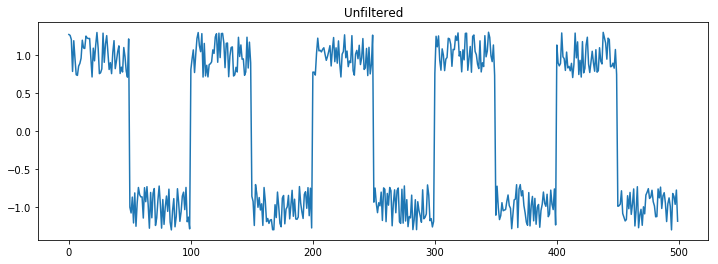

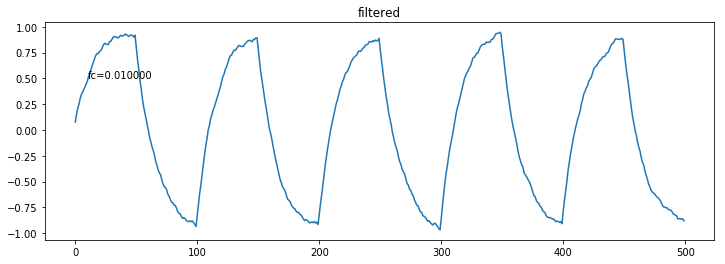

In [5]:
#3.b)filtering the wave b) low_pass aysmetry
fc = 500/50000
wave1 = low_pass(wave,fc)
#multiple graphs to to see results better
plt.figure(figsize=(12,4))
plt.title("Unfiltered")
plt.plot(wave)

plt.show()
plt.figure(figsize=(12,4))
plt.plot(wave1)
plt.title("filtered")
plt.text(10, 0.5, r'fc=%5.6f' %(fc))

#can see that the filtered wave is asysmetric
plt.show()

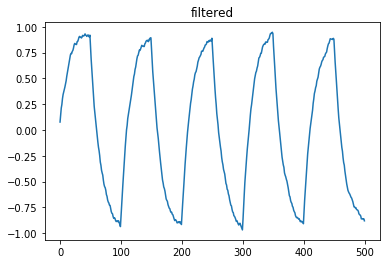

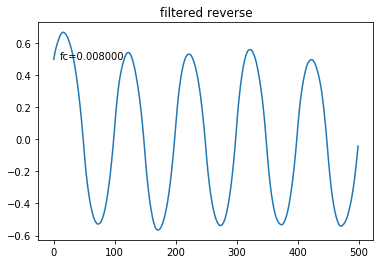

In [6]:
#3.b)filtering the wave b) low_pass aysmetry
fc = 400/50000
#fix by filtering the signal again in reverse
wave2 = low_pass(wave1,fc,reverse=True)
#multiple graphs to compare only 50 to see results better
plt.title("filtered")
plt.plot(wave1)

plt.show()
plt.title("filtered reverse")
plt.text(10, 0.5, r'fc=%5.6f' %(fc))
plt.plot(wave2)

#now the square look like a sine wave
plt.show()

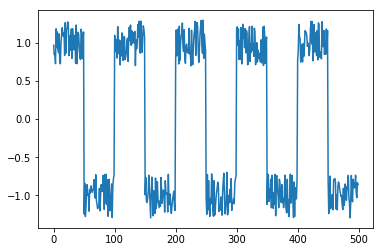

In [7]:
#3.d) time the functions
#lab 2 moving averages
def myconvu(base,sys):
    limitb = len(base)
    limits = len(sys)
    out=[0]*len(base)
    ave = 0
    
    i= 0

    while i < limitb:
        j = 0
        while j < limits:
            if ((i-j)<len(base)) and ((i-j)>0):
                out[i]+= sys[j]*base[i-j]
            j+=1
        i+=1
    return out

def low_square(length):
    total = 1
    out=[0]*length
    size = total/length
    i = 0
    while i < length:
        out[i]=size
        i+=1
    return out

#noisy wave
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

noise = np.random.uniform(-0.3,0.3,50000)
#wave
t = np.linspace(0, 1, 50000, endpoint=False)
wave3 = signal.square(2 * np.pi * 500 * t) +noise
plt.plot(wave3[0:500])

plt.show()

Run time: 0.766 s


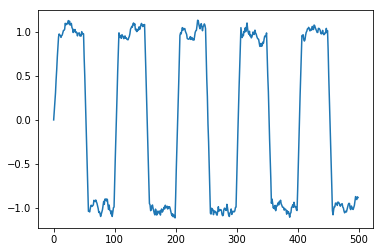

Run time: 0.141 s


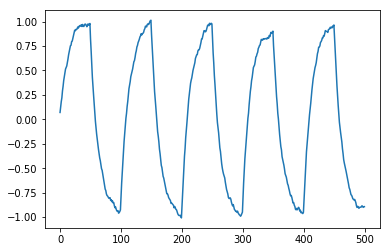

In [8]:
#3.d) time the functions
import time
#lab2 filter
ave = low_square(8)
time_start = time.process_time()
wave4 = myconvu(wave3,ave)
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
plt.plot(wave4[0:500])
plt.show()
#recrsive filter
fc = 600/50000
time_start = time.process_time()
wave5 = low_pass(wave3,fc)
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
plt.plot(wave5[0:500])
plt.show()

#recrisive is ten time faster but  create roll of

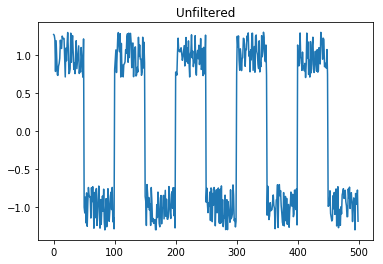

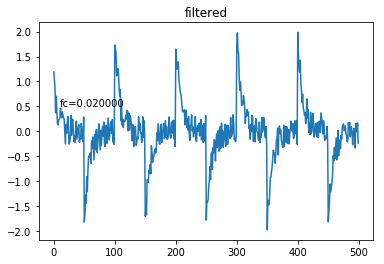

In [9]:
#4.a)high pass filters
fc = 1000/50000
hwave1 = high_pass(wave,fc)
#multiple graphs to compare only 500 to see results better
plt.title("Unfiltered")
plt.plot(wave)
plt.show()
plt.title("filtered")
plt.text(10, 0.5, r'fc=%5.6f' %(fc))
plt.plot(hwave1)

plt.show()

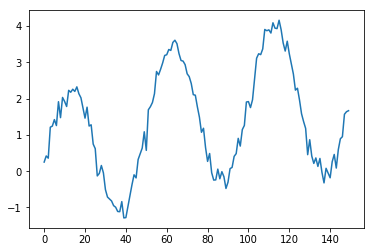

In [10]:
#4.b) generate wave
A=2
f=50.0
T=1/f
fs=50*f
Ts=1/fs
cycles=3
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.2*np.pi*f*t[i])+np.random.normal(0,.2)
    i+=1
plt.plot(x)
plt.show()
#made the wave 

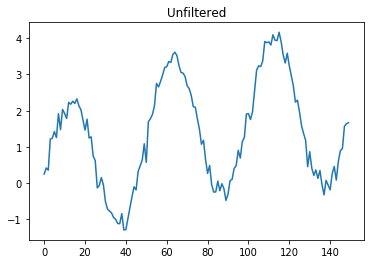

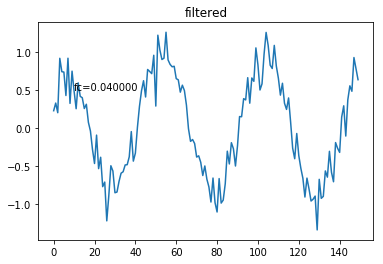

In [11]:
fc = 100/2500
hwave2 = high_pass(x,fc)
#multiple graphs to compare only 500 to see results better
plt.title("Unfiltered")
plt.plot(x)
plt.show()
plt.title("filtered")
plt.text(10, 0.5, r'fc=%5.6f' %(fc))
plt.plot(hwave2)

plt.show()
# the filter wave still have noise but the incline of the wave dissapere

In [1]:
#5.filter sounds
import IPython
from scipy.io import wavfile
fs, data = wavfile.read("CFA.wav") #fs is the sampling rate
x = data 
plt.plot(x)
plt.show()
print(fs)

NameError: name 'plt' is not defined

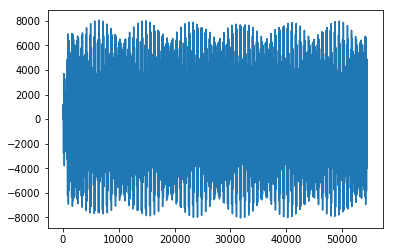

In [13]:
#band-pass A = 440 hz
fc = 340/fs
bw= 20/fs
x1 = band_pass(x,fc,bw)
plt.plot(x1)
plt.show()
#hard to tell the change

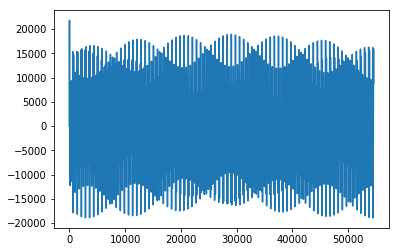

In [18]:
#band-reject A = 440 hz
fc = 340/fs
bw= 50/fs
x2 = band_reject(x,fc,bw)
plt.plot(x2)
plt.show()
#hard to tell the change

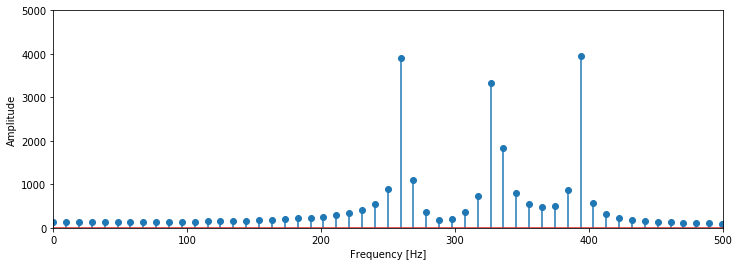

In [15]:
#the unfiltered
fft = np.fft.fft(x[:5000]) #xsamp is your stem plot data
N = len(x[:5000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([0,500,0,5000])
plt.stem(f,np.abs(fft)/N)
plt.show()
#see the three peaks

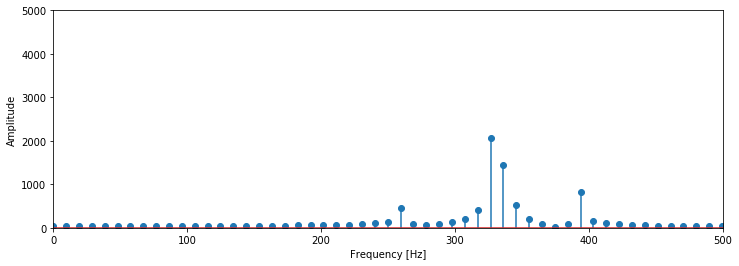

In [19]:
#the filtered band_pass
fft = np.fft.fft(x1[:5000]) #xsamp is your stem plot data
N = len(x1[:5000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([0,500,0,5000])
plt.stem(f,np.abs(fft)/N)
plt.show()
#the peaks other than A are less promenents

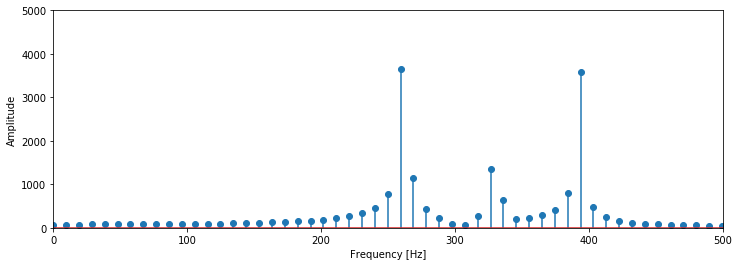

In [20]:
#the filtered band_pass
fft = np.fft.fft(x2[:5000]) #xsamp is your stem plot data
N = len(x2[:5000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.axis([0,500,0,5000])
plt.stem(f,np.abs(fft)/N)
plt.show()
#the peak of the A wave decreased but not by much